# Understanding the Penguin Dataset
##Dataset Overview
The Penguin dataset is a well-known dataset that contains measurements of various species of penguins, collected by the Palmer Station, Antarctica. It is a great alternative to the Iris dataset for machine learning tasks.

## Features of the Penguin Dataset:

Species: Target label (Adelie, Gentoo, or Chinstrap)

**Bill Length**: Measured in millimeters

**Bill Depth**: Measured in millimeters

**Flipper Length**: Measured in millimeters

**Body Mass**: Measured in grams

**Island**: Where the penguins were located

**Sex**: Male or female

We will use this dataset to classify penguin species based on their physical attributes.




  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


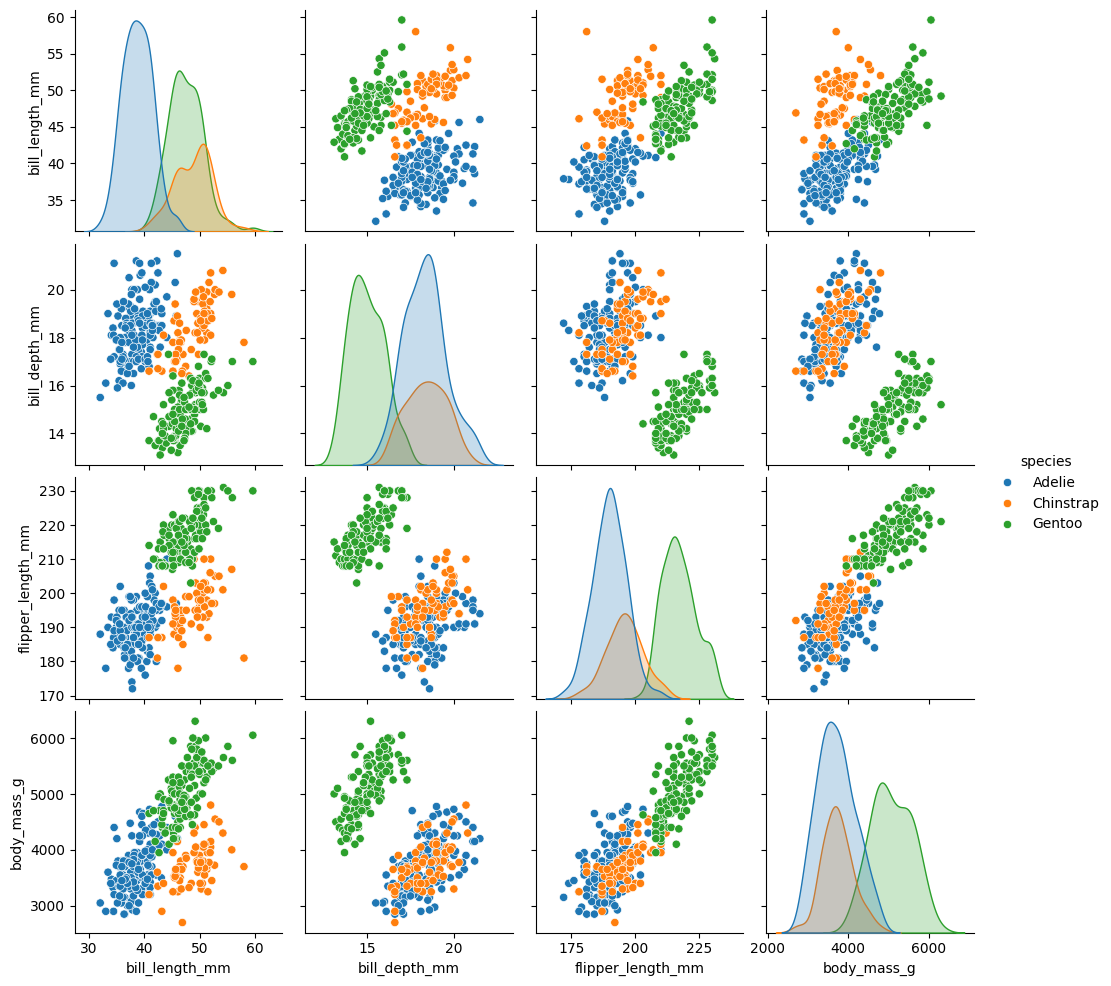

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load the penguin dataset
penguins = sns.load_dataset("penguins")

# Display the first few rows
print(penguins.head())

# Visualize the data distribution
sns.pairplot(penguins, hue="species")
plt.show()


## Preprocessing the Data
Before using KNN, we need to handle missing values and encode categorical variables.

In [ ]:
# Handle missing values by dropping rows with NaNs
penguins = penguins.dropna()

# Encode categorical variables (sex and island)
penguins['sex'] = penguins['sex'].map({'Male': 0, 'Female': 1})
penguins['island'] = penguins['island'].astype('category').cat.codes

# Define the feature set and target
X = penguins.drop(columns='species')
y = penguins['species']


### Can you tell the differnce between the 3 species?


*   Chinstrap
*   Gentoo
*   Adelie



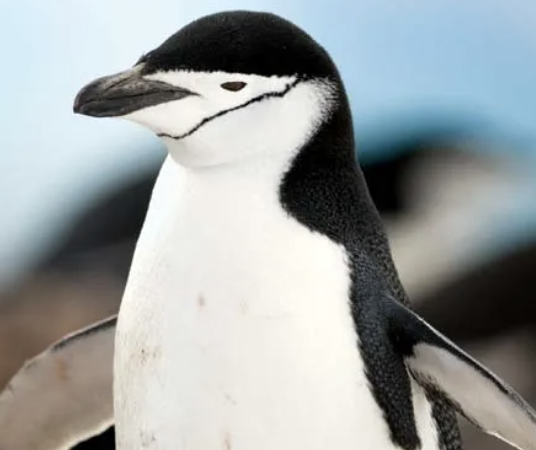

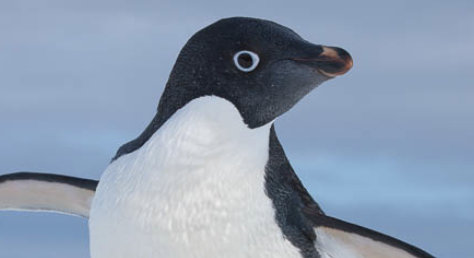


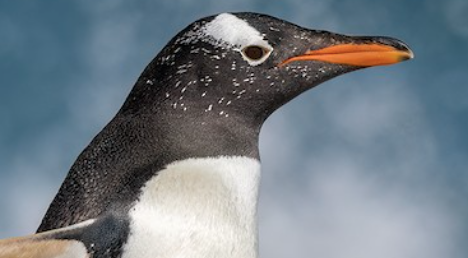

### Implementing KNN from Scratch
We will implement KNN manually by calculating distances and making predictions.

In [ ]:
from collections import Counter
import numpy as np

# Function to calculate Euclidean distance
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# KNN algorithm
def knn_predict(X_train, y_train, X_test, k=3):
    predictions = []
    for test_point in X_test:
        distances = []
        for i, train_point in enumerate(X_train):
            distance = euclidean_distance(test_point, train_point)
            distances.append((distance, y_train[i]))

        # Sort by distance and get the k nearest neighbors
        distances.sort(key=lambda x: x[0])
        k_nearest_neighbors = distances[:k]

        # Majority voting
        labels = [neighbor[1] for neighbor in k_nearest_neighbors]
        most_common = Counter(labels).most_common(1)[0][0]
        predictions.append(most_common)

    return predictions


## Using Scikit-Learn for KNN
We can also use the KNeighborsClassifier from the scikit-learn library.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Encode species labels
#What does LabelEncoder do?
#It transforms categorical labels (like strings) into numerical labels (like integers).
#This is often necessary for machine learning algorithms that require numerical data.
#It assigns a unique integer to each unique category in the data.

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the model n_neighbors is the k value
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 76.00%


## Evaluating the KNN Model
**Accuracy**: Proportion of correct predictions.

**Confusion** **Matrix**: Provides insights into true positives, false positives, etc.

**Cross-Validation**: Ensures the model generalizes well.

In [ ]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)


[[36  9  3]
 [10  8  0]
 [ 1  1 32]]


Since we're working with a dataset with three classes (for example, Adelie, Gentoo, and Chinstrap penguins), we can interpret each element of the matrix as the above matrix

# Breakdown of the Confusion Matrix:



```
[36  9  3]
[10  8  0]
[ 1  1 32]
```



## First row (Actual class: Adelie):

36: The model correctly predicted 36 Adelie penguins as Adelie (true positives).

9: The model incorrectly predicted 9 Adelie penguins as Gentoo (false positives for Gentoo).

3: The model incorrectly predicted 3 Adelie penguins as Chinstrap (false positives for Chinstrap).

## Second row (Actual class: Gentoo):

10: The model incorrectly predicted 10 Gentoo penguins as Adelie (false negatives for Adelie).

8: The model correctly predicted 8 Gentoo penguins as Gentoo (true positives).

0: The model predicted no Gentoo penguins as Chinstrap (this is good for this class).

## Third row (Actual class: Chinstrap):

1: The model incorrectly predicted 1 Chinstrap penguin as Adelie (false negatives for Adelie).

1: The model incorrectly predicted 1 Chinstrap penguin as Gentoo (false negatives for Gentoo).

32: The model correctly predicted 32 Chinstrap penguins as Chinstrap (true positives).


# Key Observations:
The model performs very well in predicting Chinstrap penguins (32 correct out of 34).

The model struggles a bit with Gentoo penguins, only correctly predicting 8 out of 18.

For Adelie penguins, the model has 36 correct predictions, but it also has significant misclassifications: 9 misclassified as Gentoo and 3 misclassified as Chinstrap.


## Precision, Recall, and F1-Score:

**Precision** for a class is the ratio of true positives to the total predicted for that class.

**Recall** for a class is the ratio of true positives to the actual total of that class.



Let's calculate these metrics for each class (Adelie, Gentoo, Chinstrap).

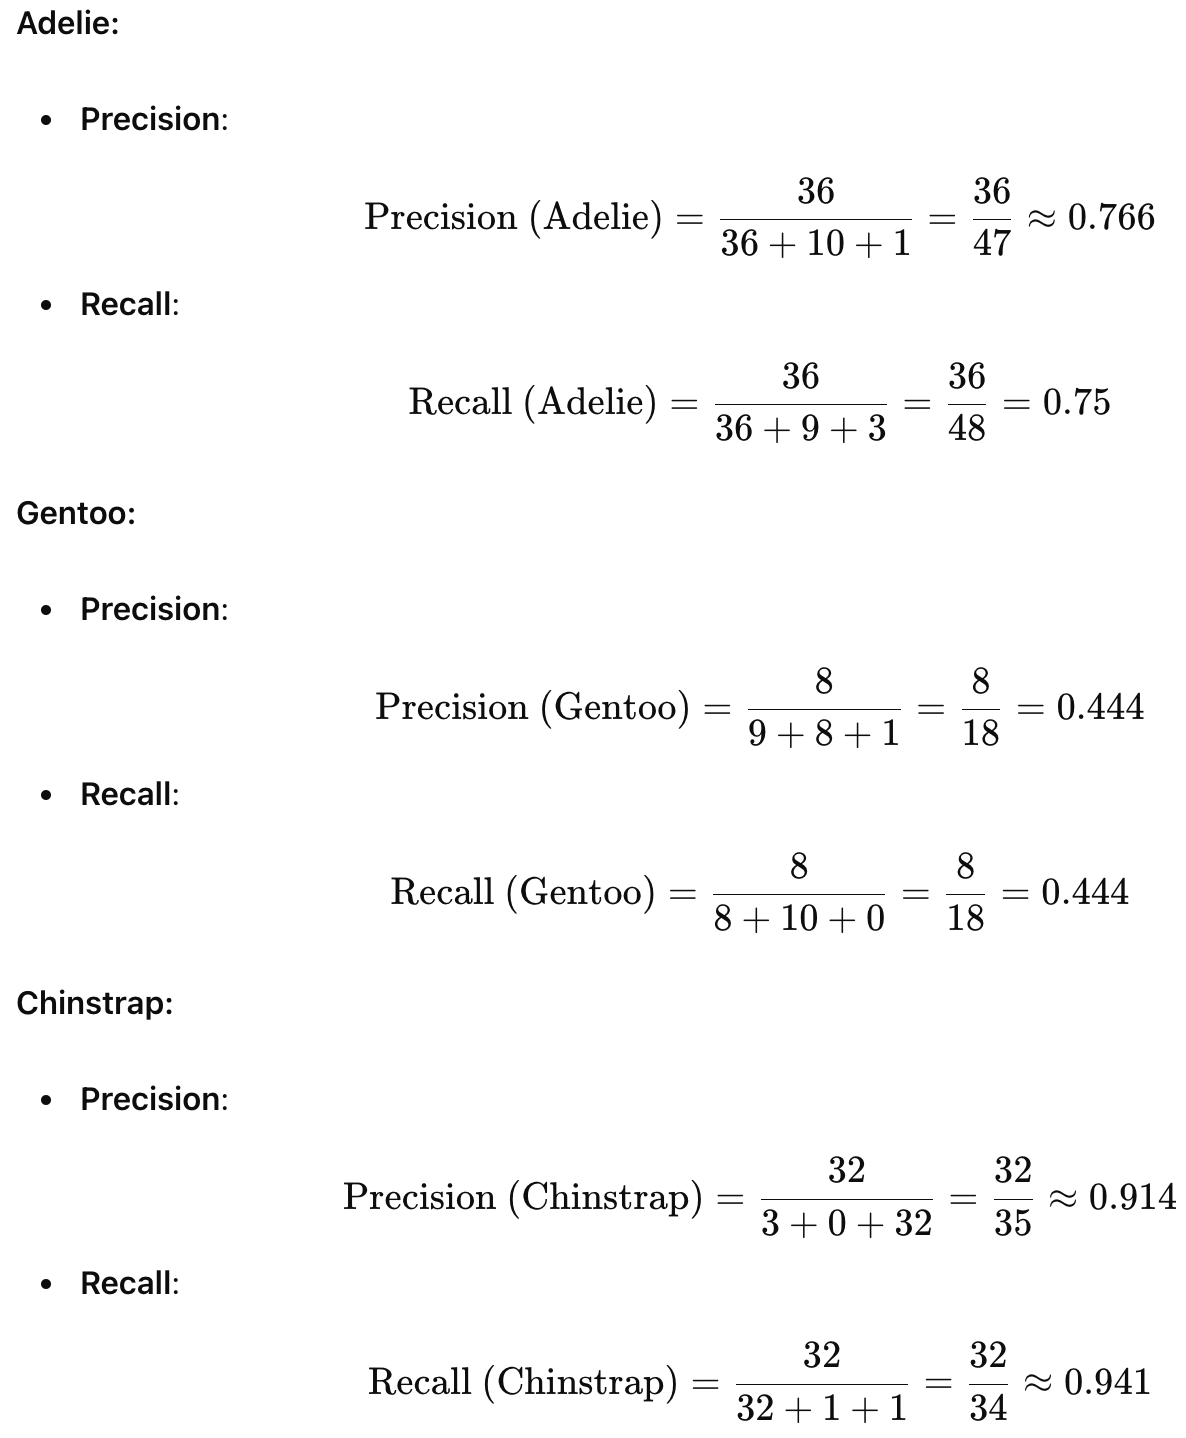

## F1-Score:
F1-Score is the harmonic mean of precision and recall, giving a balance between the two. It’s particularly useful when the data is imbalanced.

For Adelie, Gentoo, and Chinstrap, you can calculate the F1-scores using:

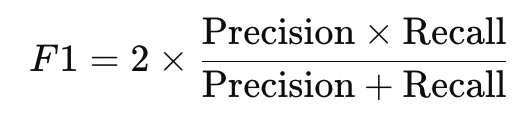

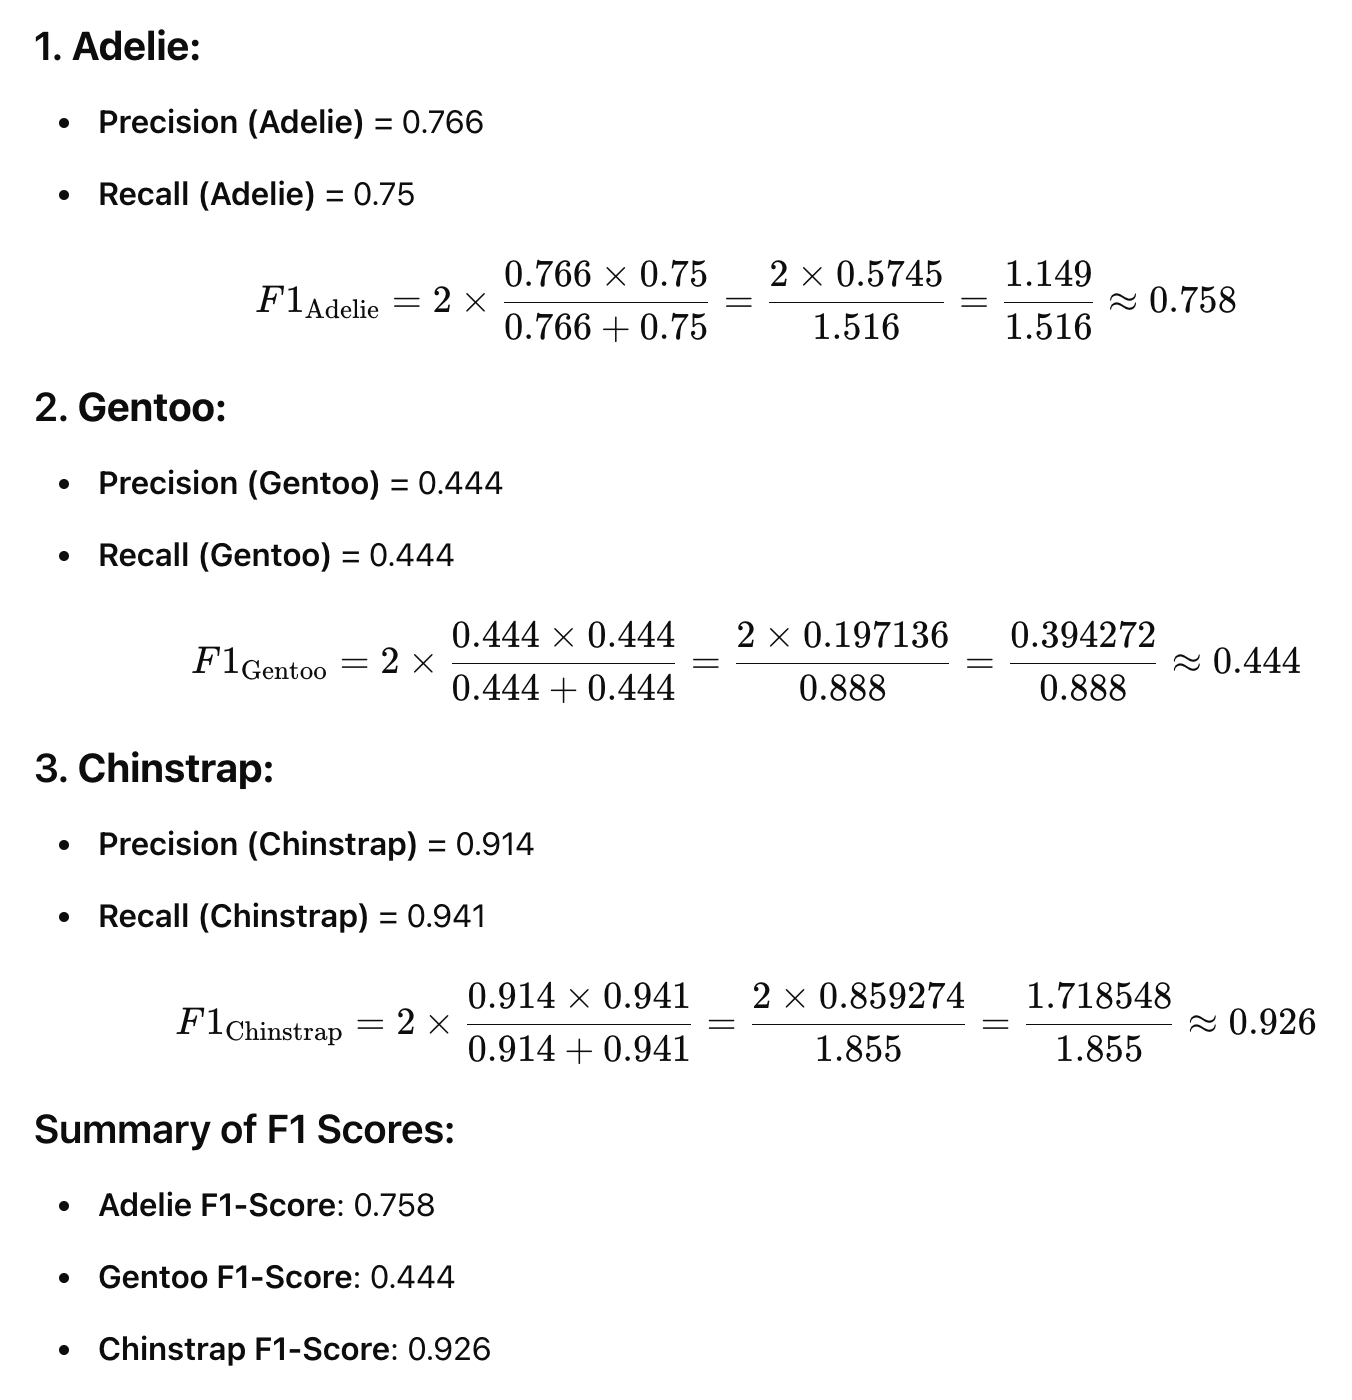


# Interpretation of the F1-scores for each class:

### **Adelie (F1 = 0.758)**
*Precision*: 0.766 means that out of all the times the model predicted "Adelie," 76.6% of those predictions were correct.

*Recall:* 0.75 means that the model correctly identified 75% of the actual "Adelie" penguins.

*F1-Score of 0.758:* This indicates that the model performs reasonably well in classifying Adelie penguins, balancing precision and recall well. However, there's still room for improvement, especially in recall.

### **Gentoo (F1 = 0.444)**
*Precision*: 0.444 means that out of all the times the model predicted "Gentoo," only 44.4% of those predictions were correct.

*Recall*: 0.444 means that the model correctly identified 44.4% of the actual "Gentoo" penguins.

*F1-Score of 0.444*: This indicates poor performance for classifying Gentoo penguins. Both precision and recall are low, meaning the model struggles to identify Gentoo penguins and often misclassifies them.

### **Chinstrap (F1 = 0.926)**
*Precision*: 0.914 means that out of all the times the model predicted "Chinstrap," 91.4% of those predictions were correct.

*Recall*: 0.941 means that the model correctly identified 94.1% of the actual "Chinstrap" penguins.

*F1-Score of 0.926*: This indicates excellent performance for classifying Chinstrap penguins. The model is highly accurate in identifying and correctly predicting Chinstrap penguins.

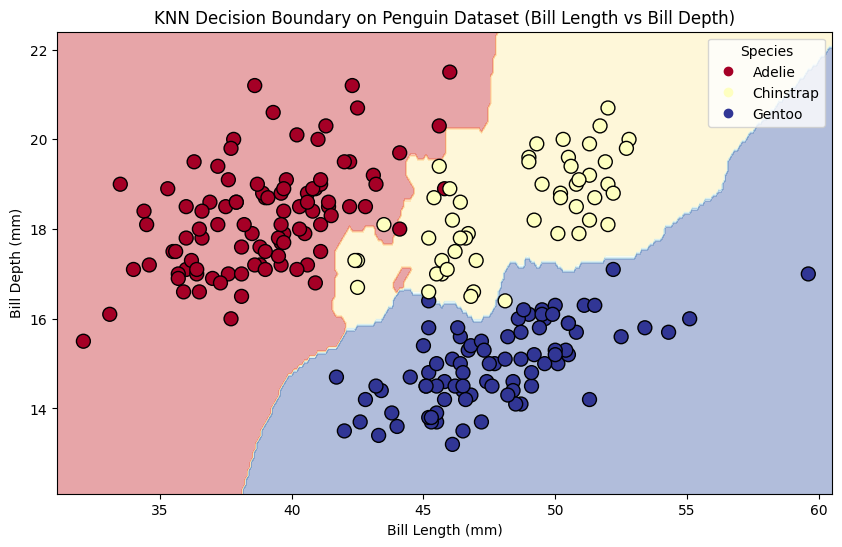

In [ ]:
# @title Decision Boundary Visual
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns

# Load the penguin dataset and select two features
penguins = sns.load_dataset("penguins").dropna()
X = penguins[['bill_length_mm', 'bill_depth_mm',]].values
y = penguins['species']

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Train a KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Create a mesh grid for plotting the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict on the mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)

# Plot the training points
scatter = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdYlBu, edgecolor='k', s=100)

# Add the species legend
handles, labels = scatter.legend_elements(prop="colors")
plt.legend(handles, label_encoder.classes_, title="Species")

plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.title('KNN Decision Boundary on Penguin Dataset (Bill Length vs Bill Depth)')
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'n_neighbors': range(1, 20)}

# Perform grid search
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Optimal k
print("Best k:", grid_search.best_params_)


Best k: {'n_neighbors': 3}


`param_grid`: This is a dictionary that defines the range of values for the hyperparameter n_neighbors that we want to test.

`range(1, 20)`: The code tests values of k (number of neighbors) from 1 to 19.

`GridSearchCV`: This method automates the process of testing multiple values for hyperparameters by trying all combinations from the defined param_grid (in this case, different values for n_neighbors).

`cv=5`: This specifies 5-fold cross-validation, which means the training data will be split into 5 parts. For each fold, 4 parts are used for training, and the remaining part is used for validation. The process repeats 5 times, using a different part for validation each time.

`fit(X_train, y_train)`: This line trains the KNN model on the training data for each value of n_neighbors from the parameter grid, applying 5-fold cross-validation for each value to evaluate model performance.

`print("Best k:", grid_search.best_params_)`: After the grid search, this attribute returns the value of n_neighbors (i.e., k) that resulted in the best performance across all cross-validation runs.
